In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_all_rpv = pd.read_csv("/run/media/mak/Heim/RPV_Results/V9/rpv_results.csv")


df_all_rpv = df_all_rpv[df_all_rpv["status"] == "success"]

grouped = df_all_rpv.drop(["cultivar","processed_at", "status"],axis=1).groupby(by=["week", "band","treatment"]).mean().reset_index()

grouped["treatment"] = grouped["treatment"].map({"no_trt": 0, "trt": 1}).astype("int64")
grouped = grouped.drop(["rc","plot_id","Unnamed: 0"],axis=1)
grouped

,week,band,treatment,index,rho0,k,theta,rmse,nrmse
0,week0,band1,0,17.5,0.100107,1.404658,-0.133691,0.024631,0.435909
1,week0,band1,1,5.5,0.077948,1.085223,-0.138268,0.023377,0.426254
2,week0,band2,0,17.5,0.265710,1.723531,-0.108646,0.035196,0.332540
3,week0,band2,1,5.5,0.150515,1.127188,-0.138893,0.033877,0.337372
4,week0,band3,0,17.5,0.304826,1.860831,-0.112583,0.055003,0.512935
5,week0,band3,1,5.5,0.159217,1.148521,-0.142698,0.052045,0.498036
6,week0,band4,0,17.5,0.570434,1.854259,-0.088188,0.064490,0.331430
7,week0,band4,1,5.5,0.252830,1.009038,-0.139209,0.062993,0.341047
8,week0,band5,0,17.5,1.040699,1.959370,-0.068330,0.124530,0.403590
9,week0,band5,1,5.5,0.468438,1.149233,-0.127761,0.121125,0.425088


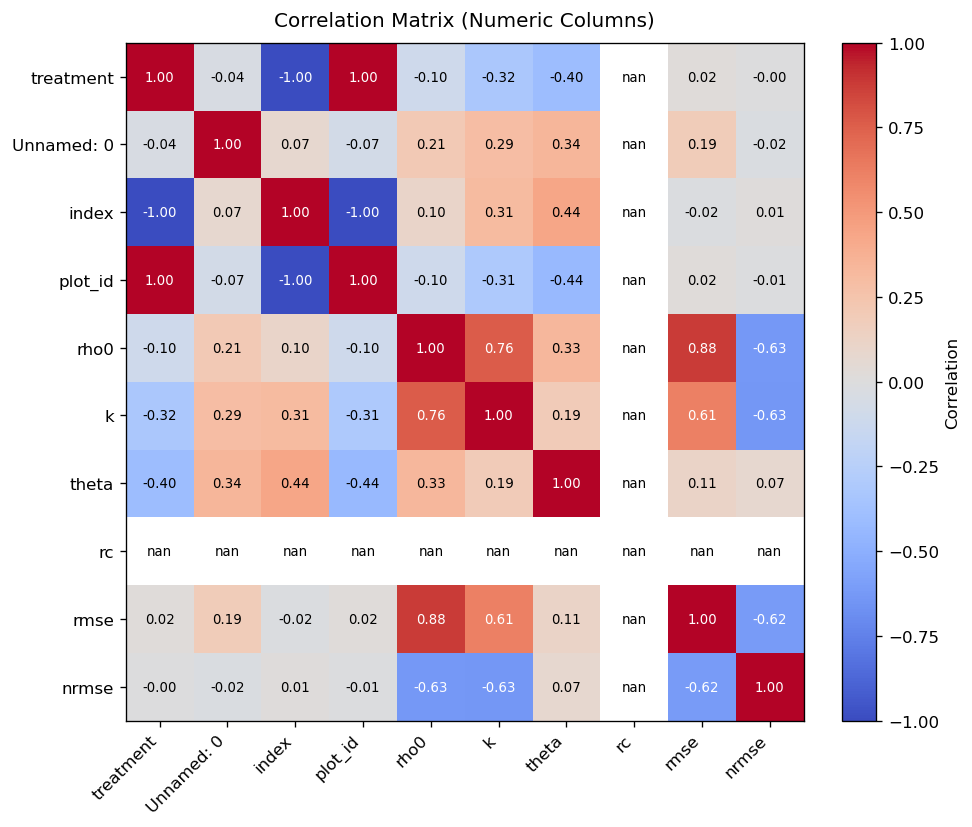

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 8) Correlation heatmap of numeric columns
num_df = grouped.select_dtypes(include=[np.number])
corr = num_df.corr()

fig, ax = plt.subplots(figsize=(9, 7), dpi=120)
im = ax.imshow(corr.values, cmap='coolwarm', vmin=-1, vmax=1)

labels = corr.columns.astype(str).tolist()
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels)
ax.set_title('Correlation Matrix (Numeric Columns)', fontsize=12, pad=10)

# Annotate correlation coefficients
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, f"{corr.values[i, j]:.2f}",
                ha='center', va='center',
                color='white' if abs(corr.values[i, j]) > 0.6 else 'black',
                fontsize=8)

cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Correlation', rotation=90)

plt.tight_layout()
plt.show()

Generating simplified parameter evolution plots (averaged over treatment)...


/tmp/ipykernel_41506/2696066270.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_avg = grouped.groupby(['week', 'band']).mean().reset_index()


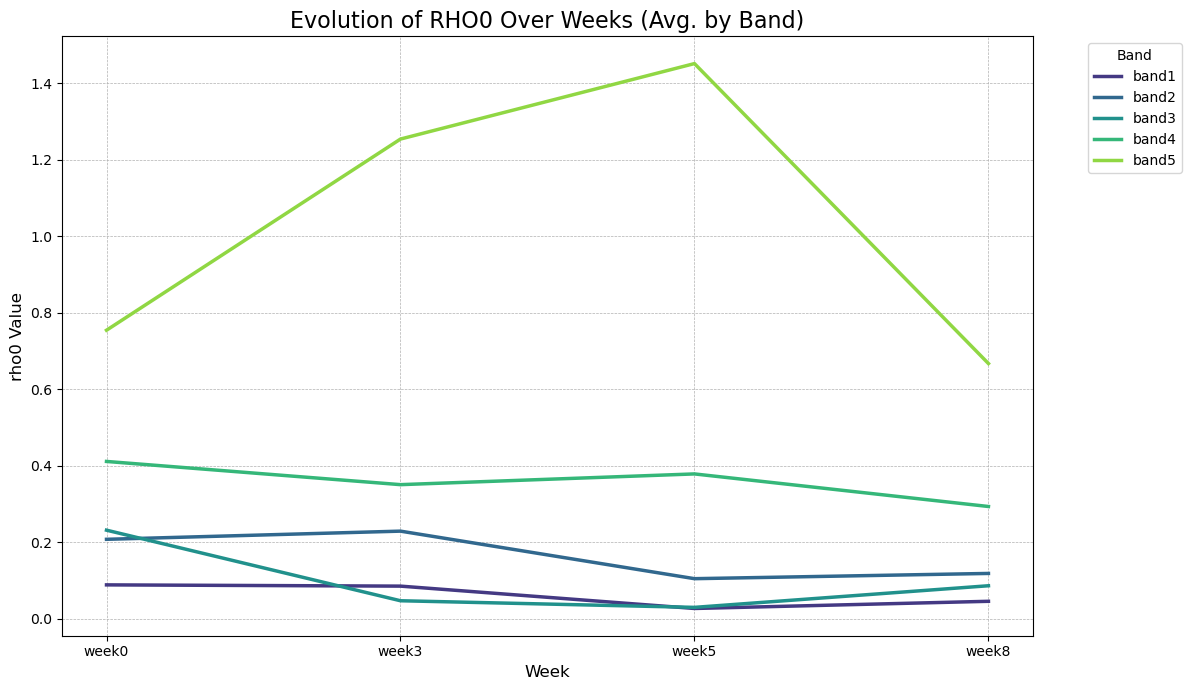

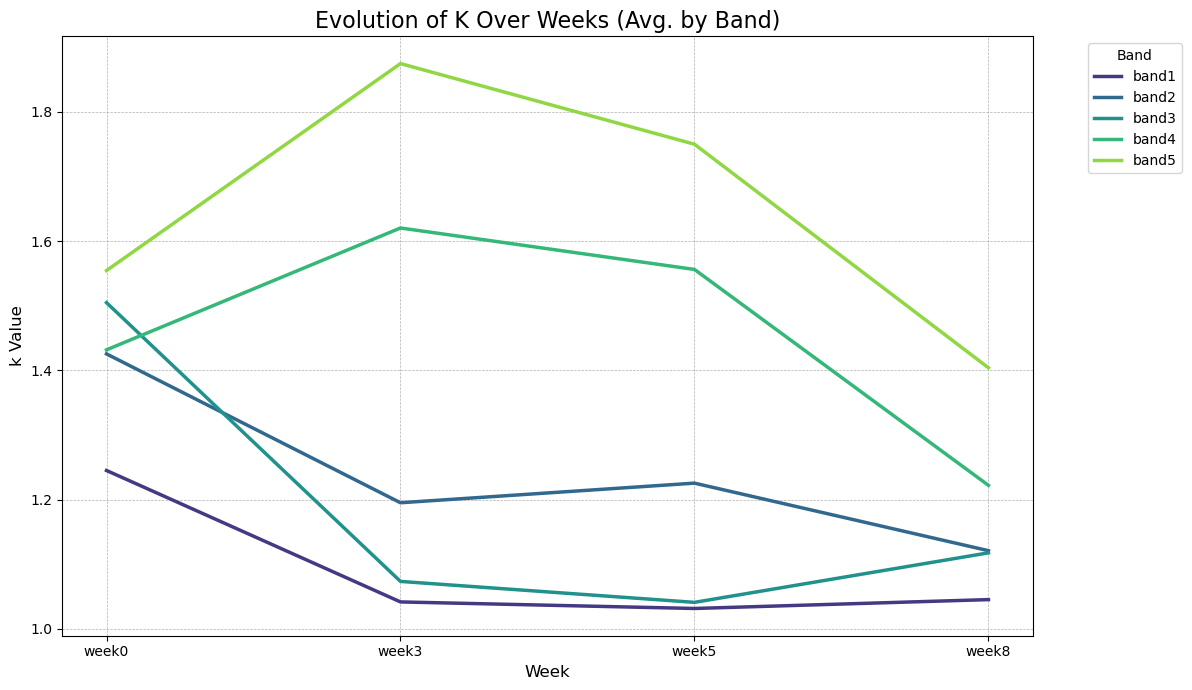

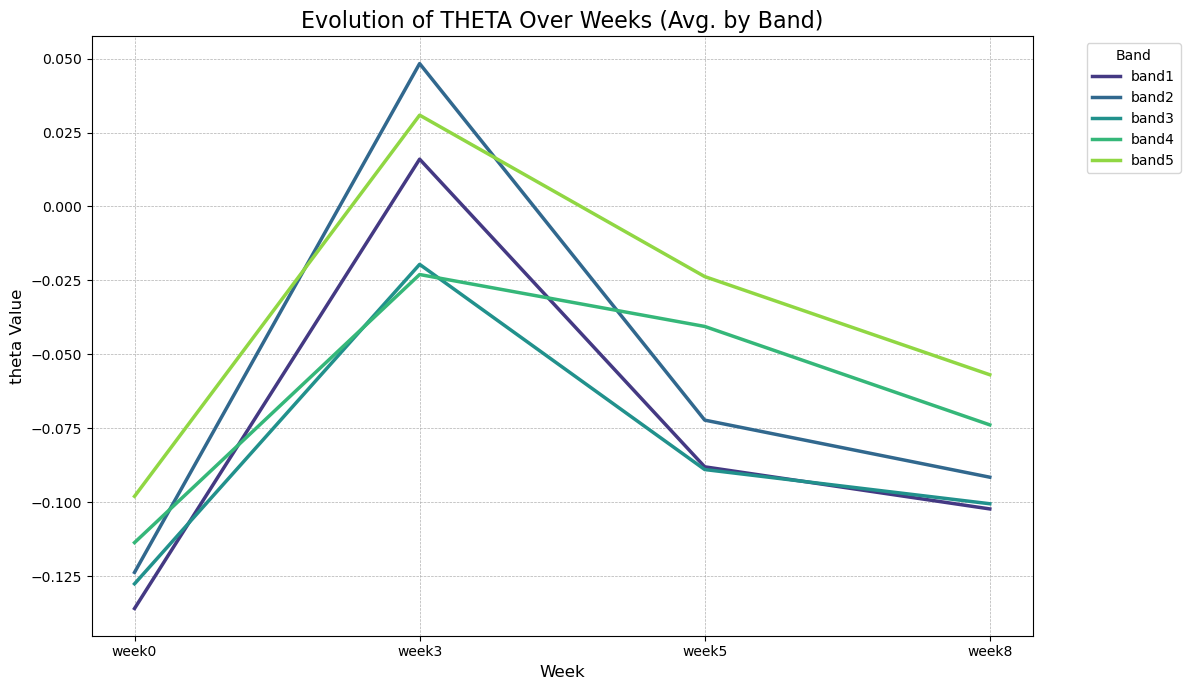

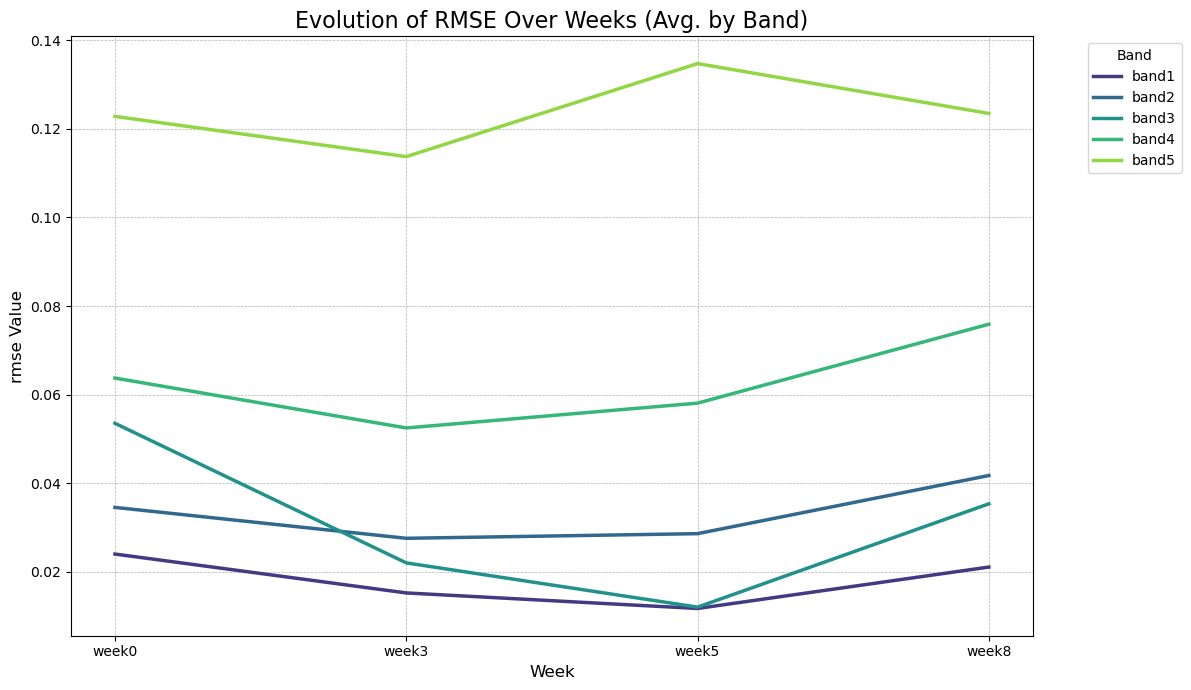

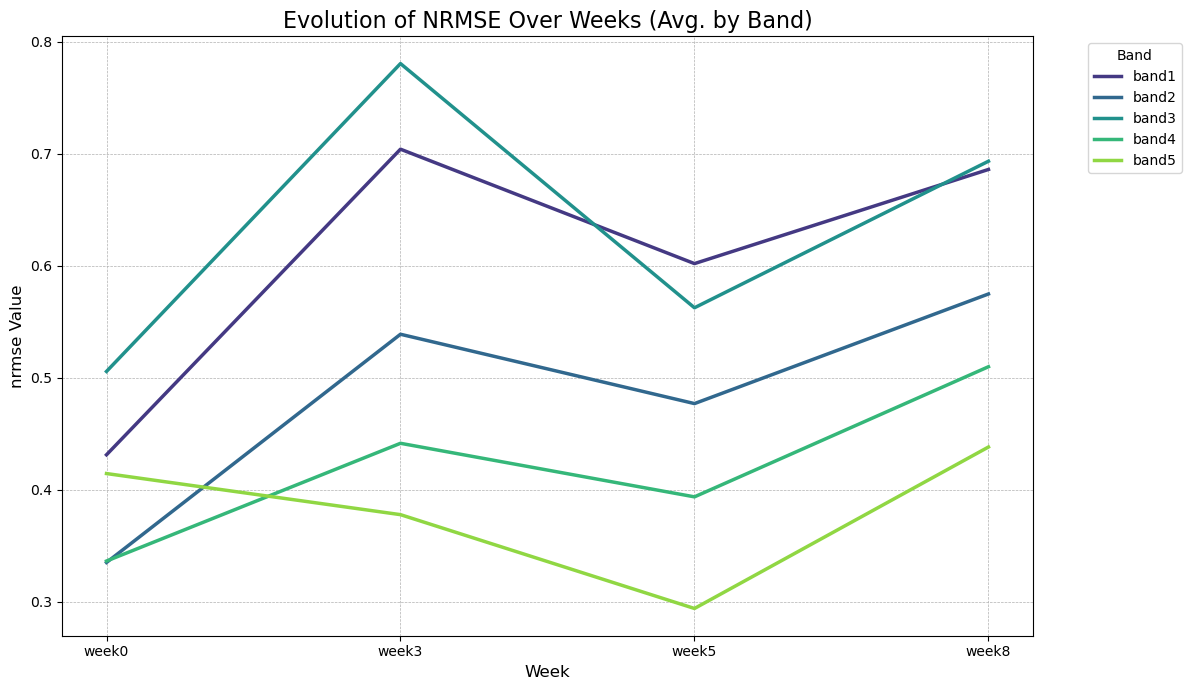


Generating line plots to compare bands at each weekly snapshot...


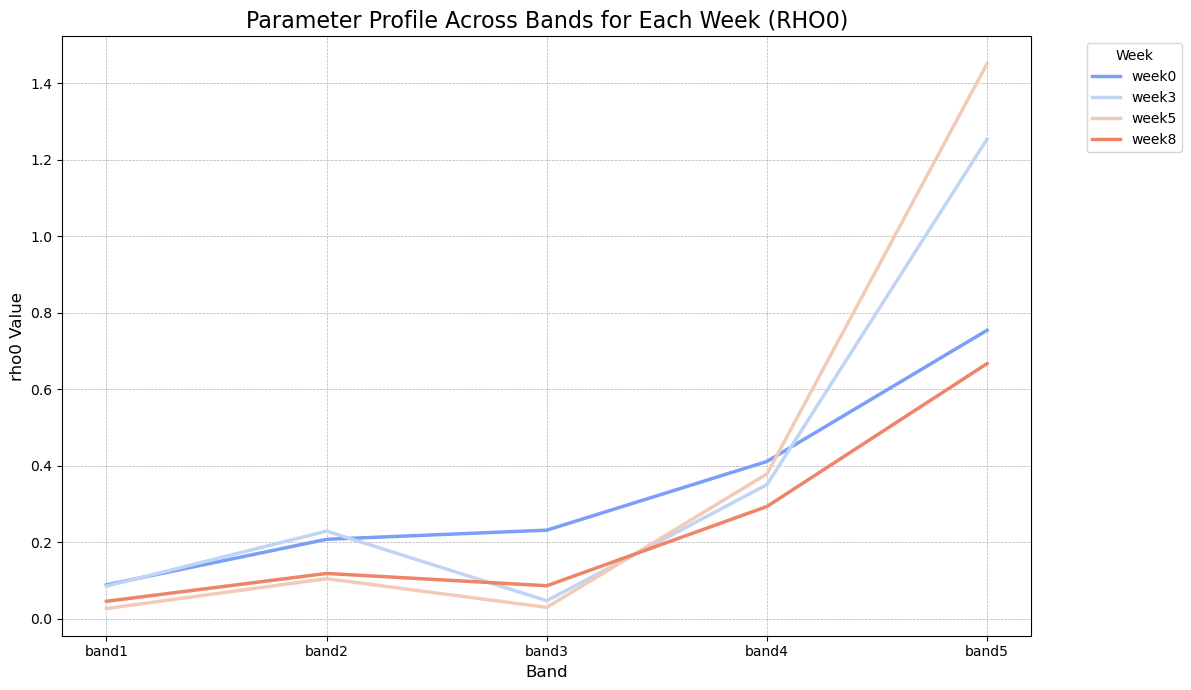

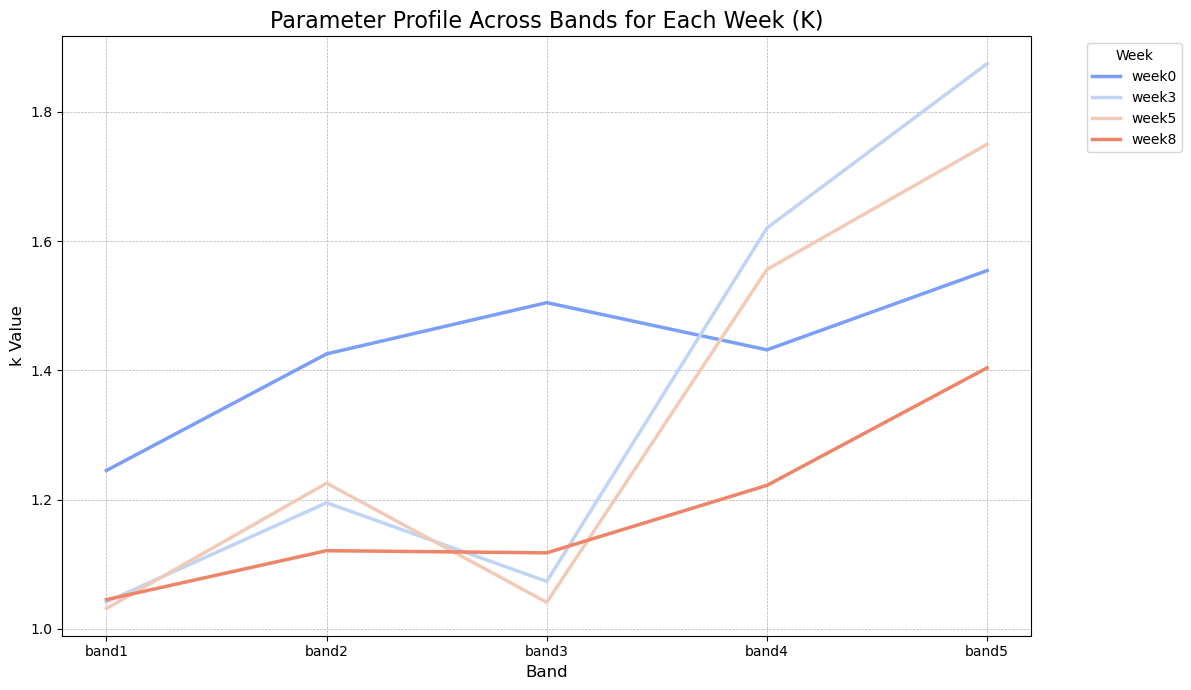

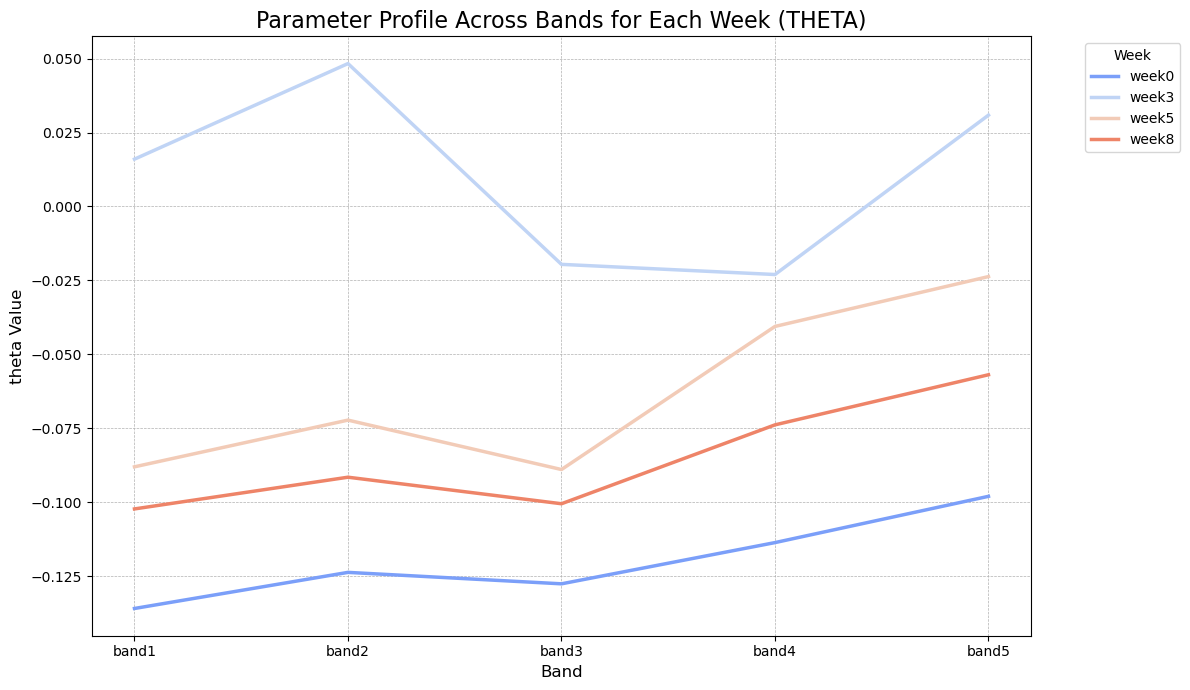

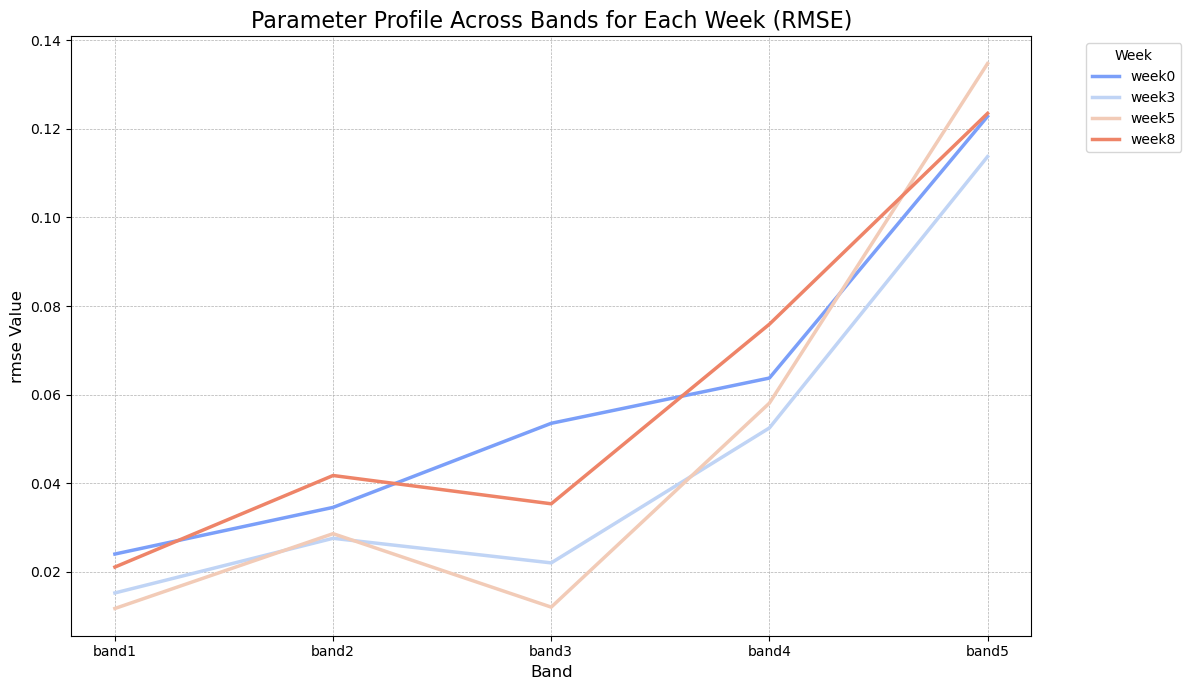

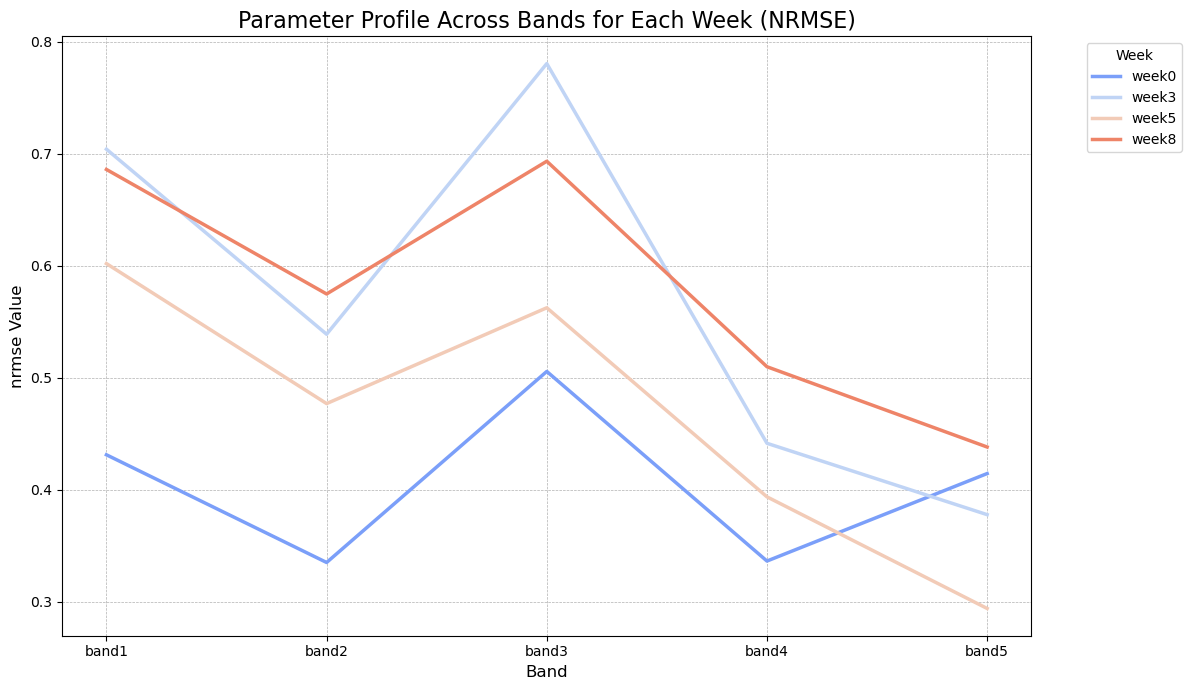


Generating dedicated plots for treatment effect analysis...


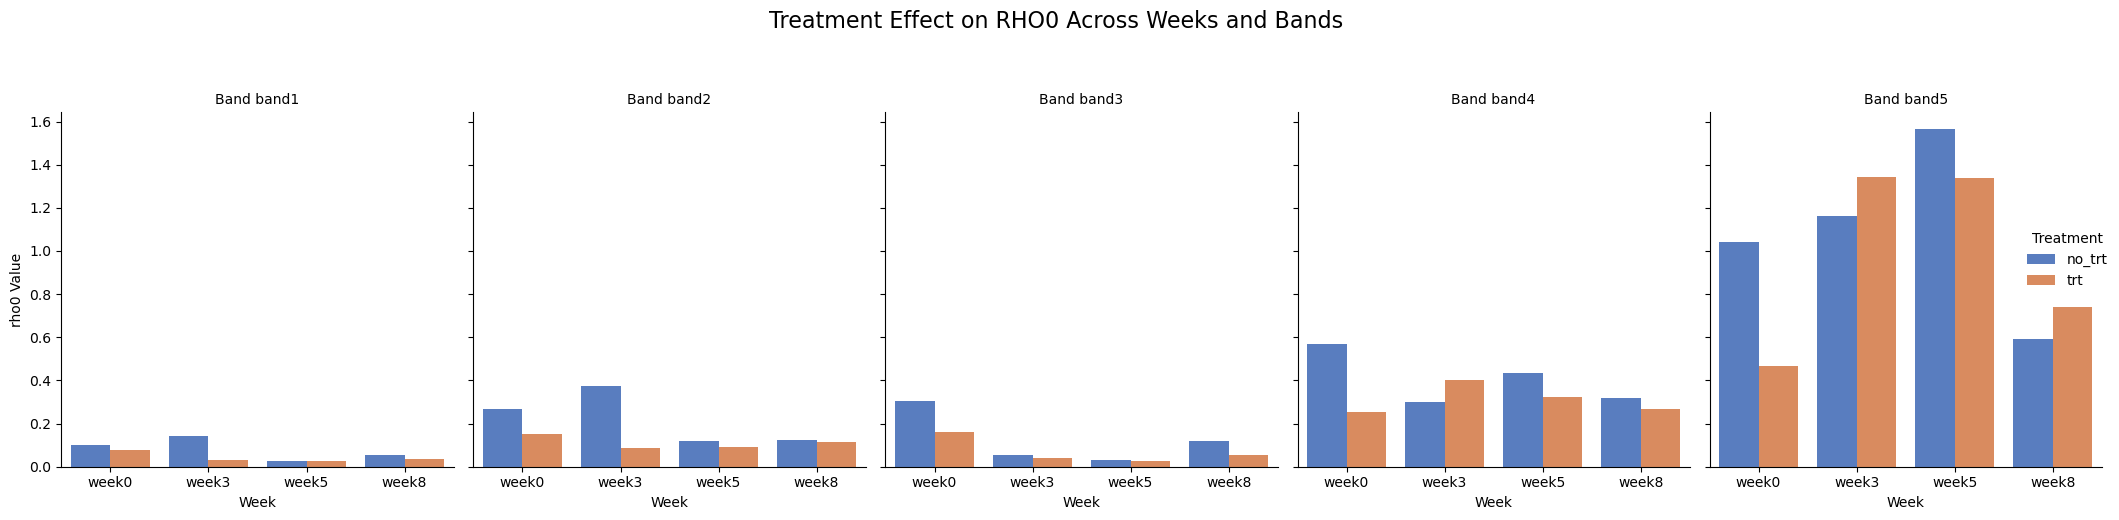

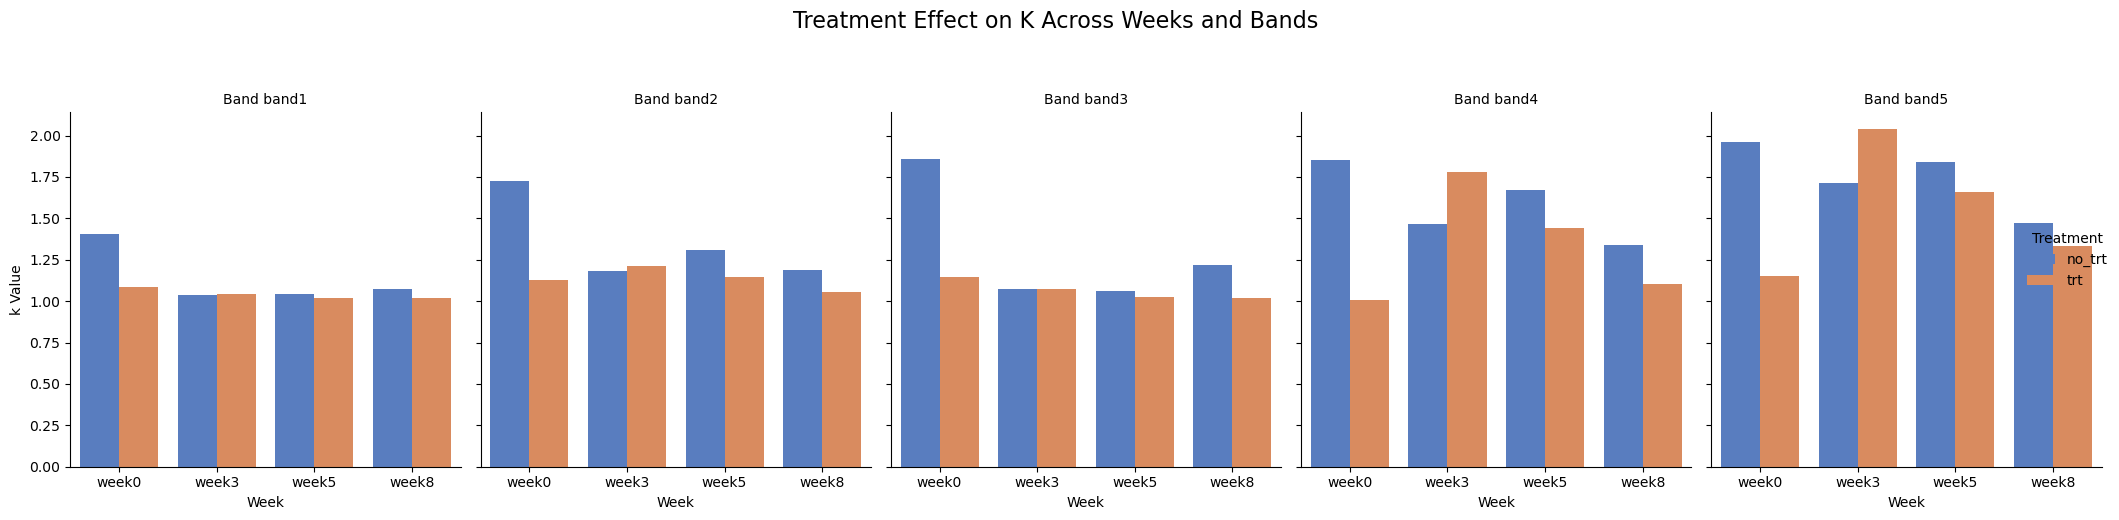

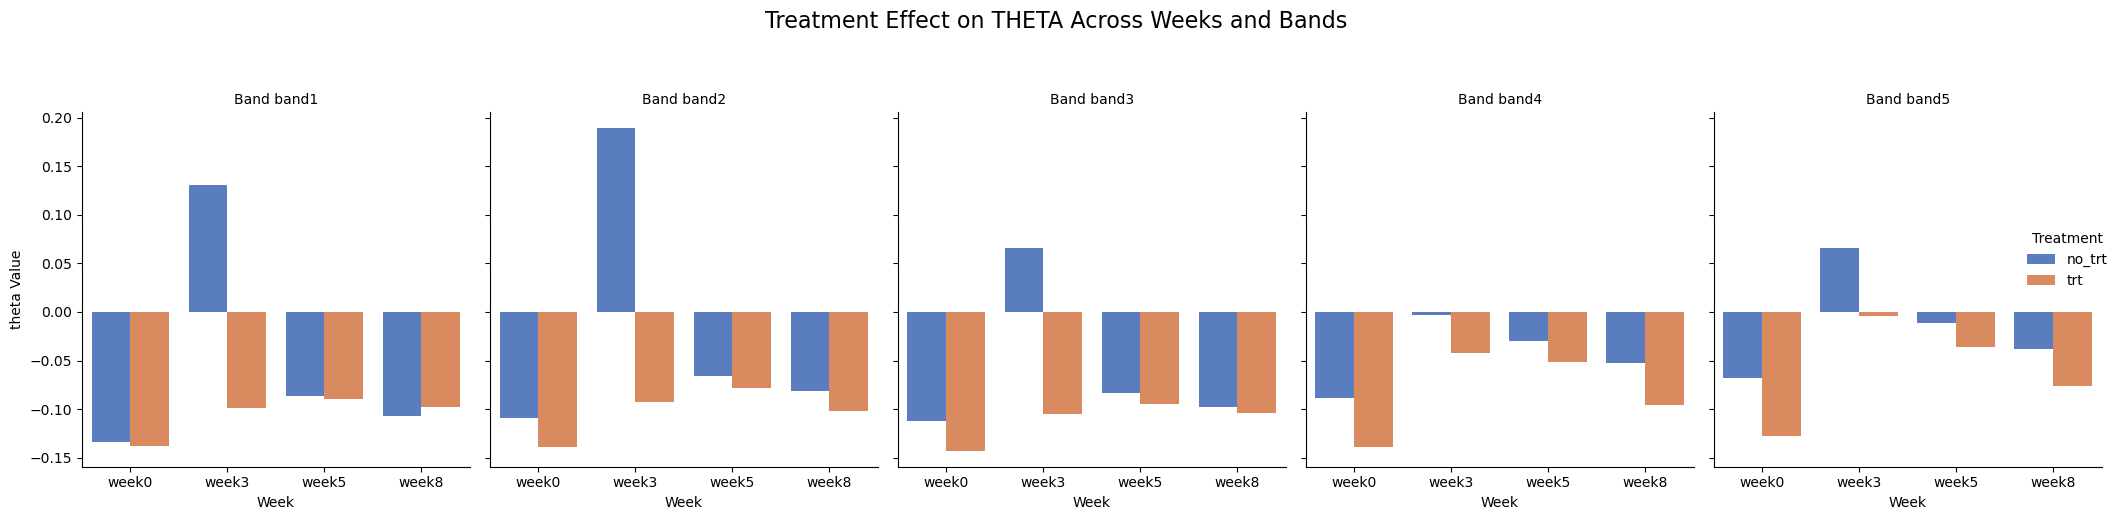

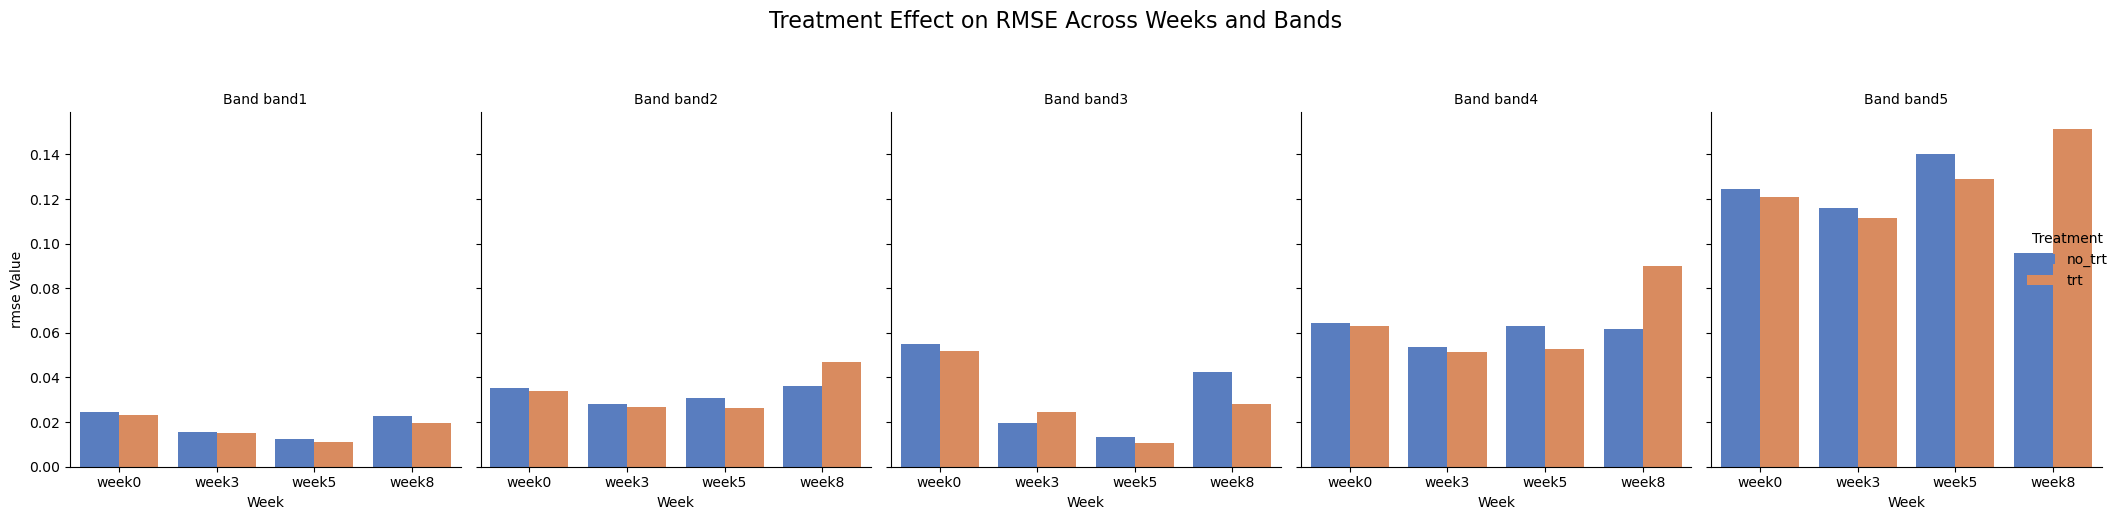

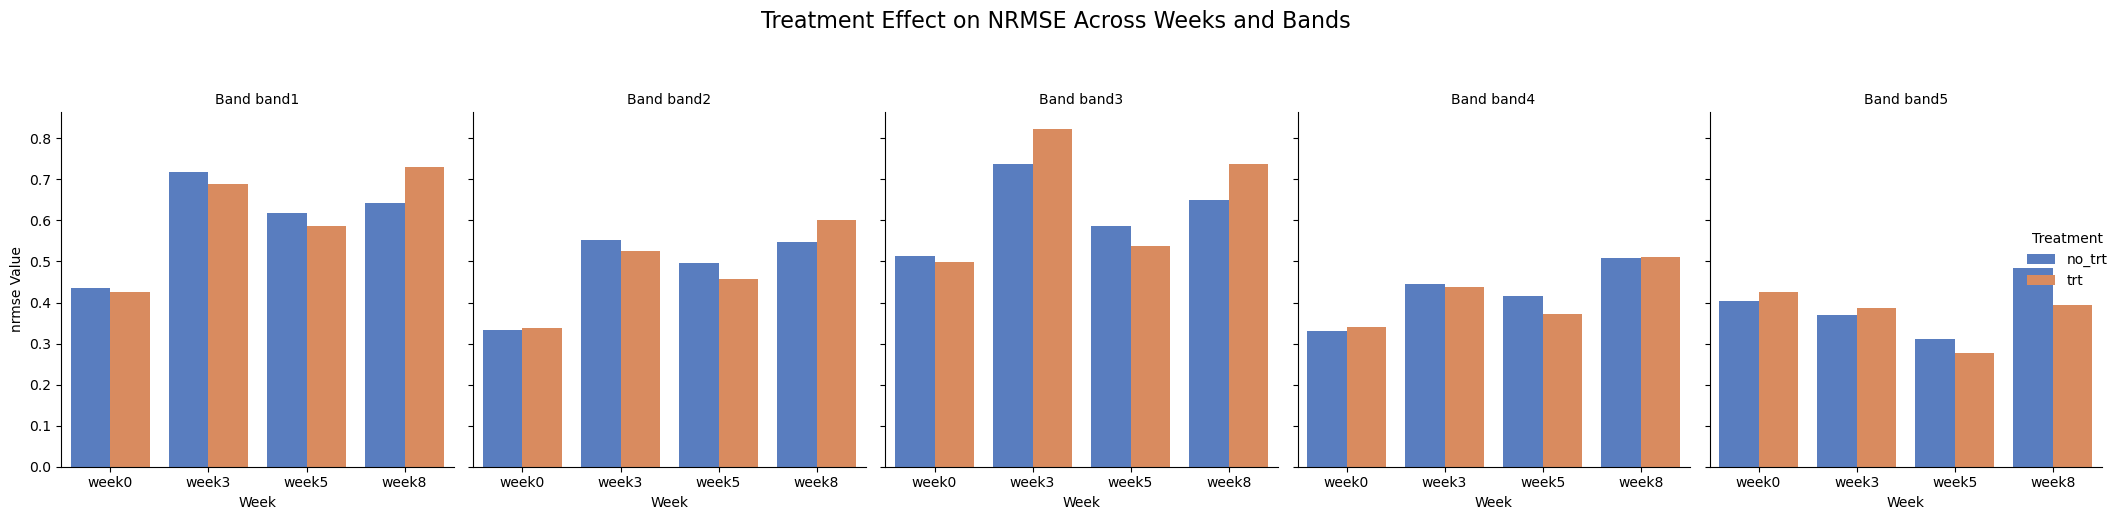


Generating correlation heatmap...


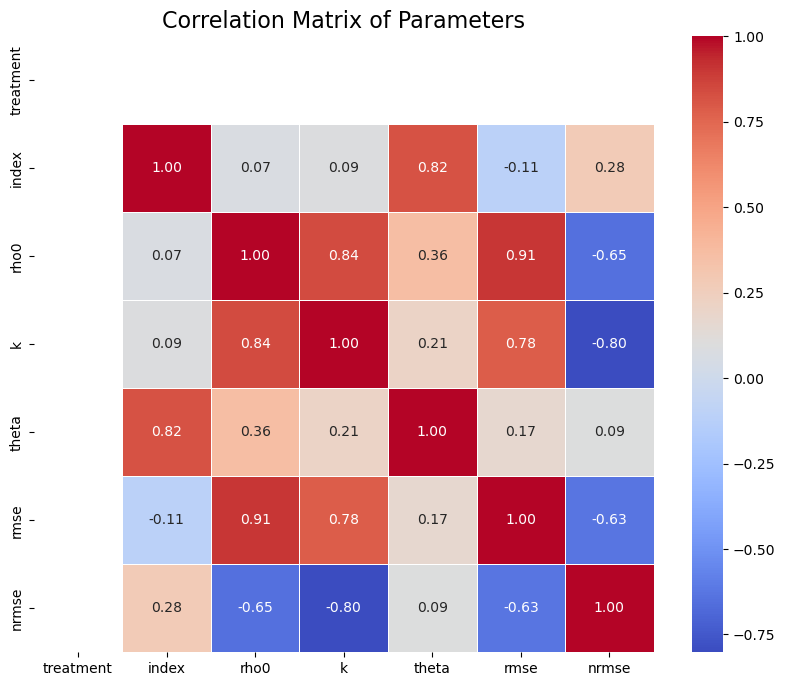

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Assume 'grouped' DataFrame is already created as per your script ---
# It has columns: ['week', 'band', 'treatment', 'index', 'rho0', 'k', 'theta', 'rmse', 'nrmse']
# and 'treatment' is mapped to 0 (no_trt) and 1 (trt).
# -------------------------------------------------------------------------

# --- Data Preparation ---
# Create a new DataFrame that averages the treatment values for the simplified plots
grouped_avg = grouped.groupby(['week', 'band']).mean().reset_index()

# Define parameters and order weeks for consistent plotting
parameters_to_plot = ['rho0', 'k', 'theta', 'rmse', 'nrmse']
week_order = sorted(grouped['week'].unique(), key=lambda w: int(w.replace('week', '')))
grouped['week'] = pd.Categorical(grouped['week'], categories=week_order, ordered=True)
grouped_avg['week'] = pd.Categorical(grouped_avg['week'], categories=week_order, ordered=True)

# --- 1. Visualization: Simplified Parameter Evolution Over Weeks ---
print("Generating simplified parameter evolution plots (averaged over treatment)...")
for param in parameters_to_plot:
    plt.figure(figsize=(12, 7))
    sns.lineplot(
        data=grouped_avg,
        x='week',
        y=param,
        hue='band',
        markers=True,
        palette='viridis',
        linewidth=2.5
    )
    plt.title(f'Evolution of {param.upper()} Over Weeks (Avg. by Band)', fontsize=16)
    plt.xlabel('Week', fontsize=12)
    plt.ylabel(f'{param} Value', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(title='Band', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# --- 2. Visualization: Comparison of Bands at Each Week (Line Plot) ---
print("\nGenerating line plots to compare bands at each weekly snapshot...")
for param in parameters_to_plot:
    plt.figure(figsize=(12, 7))
    sns.lineplot(
        data=grouped_avg,
        x='band',
        y=param,
        hue='week',
        markers=True,
        palette='coolwarm',
        linewidth=2.5,
        sort=False # Keep the original band order
    )
    plt.title(f'Parameter Profile Across Bands for Each Week ({param.upper()})', fontsize=16)
    plt.xlabel('Band', fontsize=12)
    plt.ylabel(f'{param} Value', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(title='Week', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# --- 3. Visualization: Dedicated Treatment Effect Analysis ---
print("\nGenerating dedicated plots for treatment effect analysis...")
# Map treatment integers back to strings for clearer labels in the plot
grouped['treatment_label'] = grouped['treatment'].map({0: 'no_trt', 1: 'trt'})

for param in parameters_to_plot:
    g = sns.catplot(
        data=grouped,
        x='week',
        y=param,
        hue='treatment_label',
        col='band',
        kind='bar',
        palette='muted',
        height=5,
        aspect=0.8
    )
    g.fig.suptitle(f'Treatment Effect on {param.upper()} Across Weeks and Bands', y=1.03, fontsize=16)
    g.set_axis_labels("Week", f'{param} Value')
    g.set_titles("Band {col_name}")
    g.legend.set_title("Treatment")
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# --- 4. Visualization: Correlation Matrix of Parameters (Unchanged) ---
print("\nGenerating correlation heatmap...")
numeric_cols = grouped_avg.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Correlation Matrix of Parameters', fontsize=16)
plt.show()